# Titanic Survival Model
Would you survive the Titanic? Find out using this machine learning model.

## Setup & reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_data = pd.read_csv('./data/train.csv')
testing_data = pd.read_csv('./data/test.csv')

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here are the ages themselves, in relation to the class of the passenger.

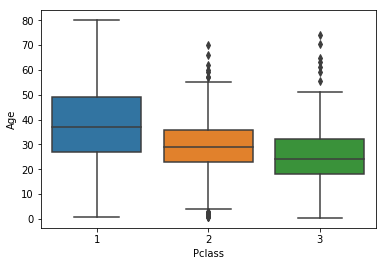

In [3]:
sns.boxplot(
    x='Pclass', y='Age',
    data=training_data
)

## Cleaning the data
This dataset is pretty messy right now, and there are a few things that we need to fix. First, lets get rid of unnecessary information that won't effect our model.

In [4]:
'''
training_data.drop(
    'Cabin',
    axis=1,
    inplace=True
)
training_data.dropna(inplace=True)
'''

"\ntraining_data.drop(\n    'Cabin',\n    axis=1,\n    inplace=True\n)\ntraining_data.dropna(inplace=True)\n"

There are also a lot of null values in this dataset, which our model will not be able to understand. We can see the null values in the dataset here:

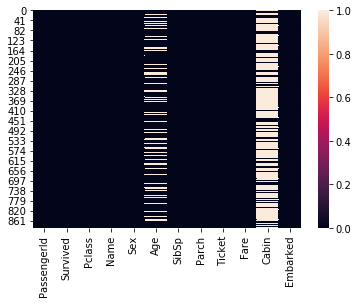

In [5]:
null_values = training_data.isnull()
sns.heatmap(null_values)

### Fixing the null values
First, lets write a function to fill all null-aged passengers with the average age of that passenger's class. However, before we do this, we must calcualte the mean ages for all different passenger classes.

In [6]:
age_means = training_data.groupby('Pclass')['Age'].mean()
print(age_means)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [7]:
def fill_missing_age(passenger):
    age = passenger[0]
    p_class = passenger[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return age_means[1] # Average age in first class
        elif p_class == 2:
            return age_means[2] # Average age in "second class"
        else:
            return age_means[3] # Average age in "third class"
    else:
        return age

Reassign every single age in the dataset with the return of our new `fill_missing_age` function.

In [8]:
training_data['Age'] = training_data[['Age', 'Pclass']].apply(fill_missing_age, axis=1)

### Getting dummy values for gender and embarked attributes
The next line will make all `male` values `1` and all `female` values `0` from our dataset and store that information in a vector.

Then, the same thing will happen for the `Embarked` feature in the dataset.

In [9]:
gender = pd.get_dummies(training_data['Sex'], drop_first=True)
embark = pd.get_dummies(training_data['Embarked'], drop_first=True)

Now we will add these new dummy values (that our model will be able to understand, for they are numerical) into our original dataset.

In [10]:
training_data.drop(
    [
        'Sex',
        'Embarked',
        'Name',
        'Ticket'
    ],
    axis=1, inplace=True
)

training_data = pd.concat(
    [training_data, gender, embark],
    axis=1
)

In [11]:
training_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


### Analysis
Now we can evaluate how well we cleaned the sex and embark data by seeing that heatmap again

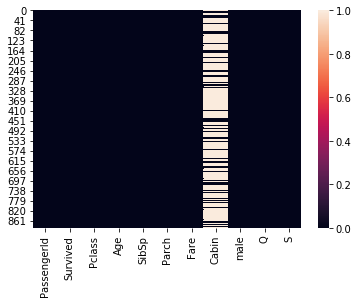

In [14]:
null_values = training_data.isnull()
sns.heatmap(null_values)

See? No null values in the sex feature anymore. That's good! Our data is now much cleaner.